

Банк хочет разработать кампанию лояльности по удержанию клиентов. Необходимо выяснить основные причины оттока клиентов



In [137]:
import pandas as pd

bank_data = pd.read_csv('data/bank.csv')

bank_df = bank_data.copy() # копируем исходную таблицу
bank_df = bank_df.drop('RowNumber', axis=1) #удаляем неинформативный столбец с нумерацией

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64


Задания

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов банка')

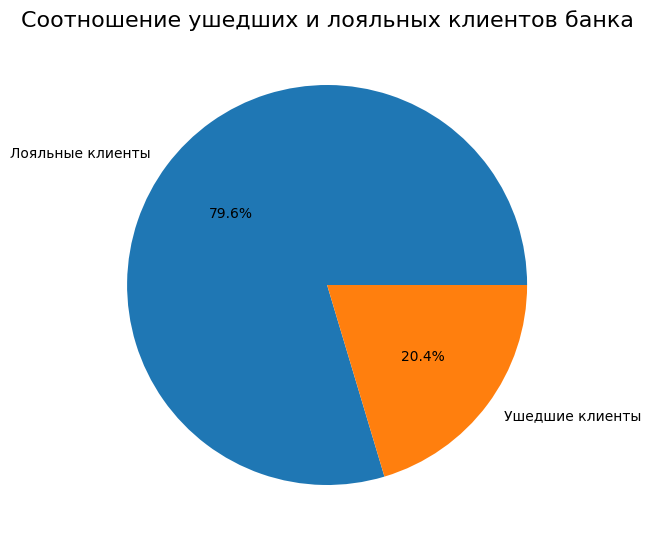

In [10]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

import matplotlib.pyplot as plt # импортируем библиотеки
%matplotlib inline

pie_data = bank_df['Exited'].value_counts()
my_labels = ['Лояльные клиенты', "Ушедшие клиенты"]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1,])
axes.pie(
    pie_data,
    labels=my_labels,
    autopct='%.1f%%'
)
axes.set_title ('Соотношение ушедших и лояльных клиентов банка', fontsize=16)

Вывод: \
данные круговой диаграммы свидетельствуют о том, что доля ушедших клиентов составляет 20% (пятая часть всех клиентов банка). При этом делать дальнейшие выводы преждевременно, так как необходимо продолжить исследование взаимосвязей между другими показателями. Предварительный анализ данных показал, что ушедшие клиенты - довольно состоятельные люди (по уровню зарплат), с хорошим кредитным рейтингом (самый частый показатель - 850) и приличными суммами, имевшимися на их счетах в банке (выше 100 тысяч долларов). То есть по логике вещей данные свидетельствют о том, что при продуманной политике банка эти клиенты должны были бы быть постоянными клиентами кредитного учреждения. Что наводит на мысль о том, что со стороны учреждения был предпринят шаг, серьезным образом повлиявших на предпочтение клиентов сменить банк 


<Axes: title={'center': 'Распределение баланса пользователей с суммой на счету более 2500 долларов'}, xlabel='Баланс на счету клиента, в $', ylabel='Количество клиентов, чел.'>

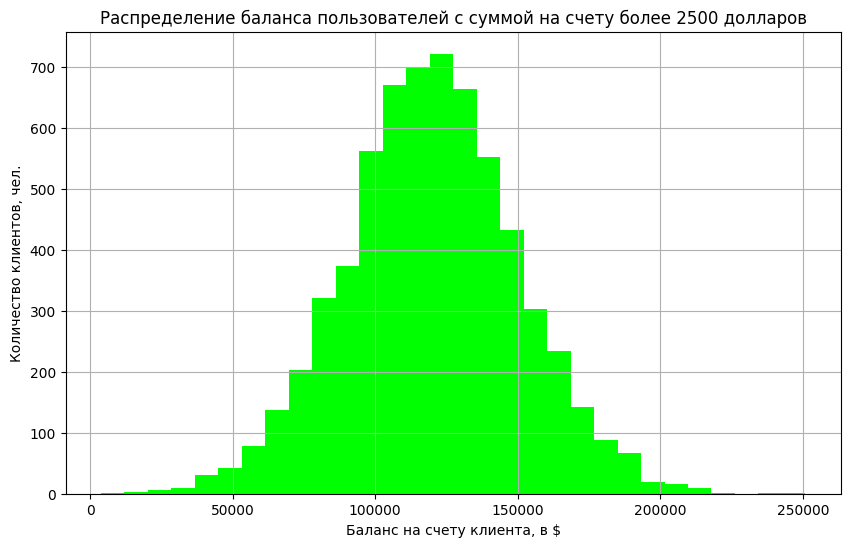

In [11]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.

hist_data = bank_df[bank_df['Balance'] > 2500]

hist_data['Balance'].plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение баланса пользователей с суммой на счету более 2500 долларов',
    grid=True,
    color='lime',
    bins=30,
    xlabel='Баланс на счету клиента, в $',
    ylabel='Количество клиентов, чел.'
)



Вывод: \
на графике можно наблюдать закон нормального распределения (закон распределения Гаусса), о чем говорит симметричная форма гистограммы в виде колокола с пиком примерно в центре интервала. Большинство рассматриваемых клиентов (более 700 человек) имеют на счету примерно 125000 долл. По графику видно, что значения с небольшими отклонениями от средней величины выпадают чаще других, а те, которые сильно отдалены от центра, встречаются значительно реже. Также бросается в глаза расположенный справа по оси х пенек, свидетельствующий о наличие у банка штучных клиентов, баланс которых в районе 230-250 тыс долл. 

In [14]:
#9.3.Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
import plotly
import plotly.express as px

fig = px.histogram(bank_df,
                   x='Balance', #показатель, отложенный по оси х
                   nbins=30,
                   title='Распределение баланса клиентов в разрезе признака оттока', #название графика
                   color="Exited", #окрасить в цвет показатель 'Exited'
                   histnorm="percent", #процент выборок в каждом столбце
                   color_discrete_sequence=['red', 'blue'], # набор расцветок в графике
                   opacity=0.6) # величина помутнения цвета
fig.update_xaxes(title_text='Баланс на счетах клиента в банке') #название оси х
fig.update_yaxes(title_text='Количество клиентов')#название оси y
fig.show()

Альтернативный график к заданию 9.3 - ящик с усами

In [15]:
fig=px.box(
    data_frame=bank_df, 
    x='Balance', 
    color='Exited', 
    width=1000, 
    height=500, 
    title='Распределение баланса клиентов в разрезе признака оттока'
)
fig.show()


*Выводы к заданию 9.3(по обоим графикам):\
Из гистограммы следует, что доля ушедших клинтов повторяет правильное распределение (аналогично доле постоянных клиентов), то есть скорее всего руководством банка было реализовано (либо только анонсировано) решение, повлиявшее на предпочтение большого количества клиентов сменить банк ( к примеру, снижение ставок по вкладам, нарушение конфиденциальности сведений клиентов (в том числе утечки данных), повышение тарифов на обслуживание кредитных карт, увеличение уровня цифровизации продуктов, к которым могут быть не довольны пользователи и т.п.). Альтернативой предыдущему предположению может служить попадание банка под определенного рода санкции. Так или иначе, для определения более точной причины необходимо располагать более точными сведениями, в какой/за какой период произошел массовый отток клиентов.
В любом случае, как и описывалось выше (в задании 9.1) банк потерял довольно "денежных" клиентов (к примеру, почти 12% из числа ушедших имели на счету сумму в районе 115-125 тыс долл.). При этом по вышеупомянутому пенька мы видим, что свое пребывание в банке свернули именно те клиенты, на счетах которых лежало максимальное количество средств. Коробчатая диаграмма также подтверждает, что именно ушедшие клиенты в среднем имели на счетах в банке бОльшую массу денег, нежели оставшиеся (см. максимальные и медианные показатели).*

In [16]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

fig=px.box(
    data_frame=bank_df, 
    x='Age', 
    color='Exited', 
    width=1000, 
    height=500, 
    title='Распределение возраста клиентов в разрезе признака оттока'
)
fig.show()

*Вывод: 
коробчатая диаграмма свидетельствует о том, что максимальный и медианный возраст ушедших клиентов на порядок превышает соответствующие показатели лояльных клиентов (71 и 57 / 51 и 41 год соответственно). Хотя, казалось бы, чем старше возраст, тем более консервативным становится человек в своих предпочтениях, не говоря уже о таких решениях, как смена кредитного учреждения. Именно на клиентов в возрастном диапазоне 38-70 и нужно обратить внимание банку для предотвращения дальнейшего оттока имеющихся клиентов, а также возможного возвращения ушедших и привлечения новых. Количество потенциальных выбросов в группе лояльных клиентов значительно больше, нежели в соседней.*  

In [17]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
fig=px.scatter(
    data_frame=bank_df, 
    x='EstimatedSalary', 
    y='CreditScore',
    color='Exited', 
    width=1000, 
    height=700, 
    title='Взаимосвязь кредитного рейтинга и зарплаты с добавлением признака оттока клиентов')
fig.show()

*Вывод:\
на диаграмме рассеивания на наблюдается какой-либо четко выраженной взаимосвязи между кредитным рейтингом клиента и его зарплатой. Единственная очевидная тенденция - банк покинули все клиенты с кредитным рейтингом ниже 400.*



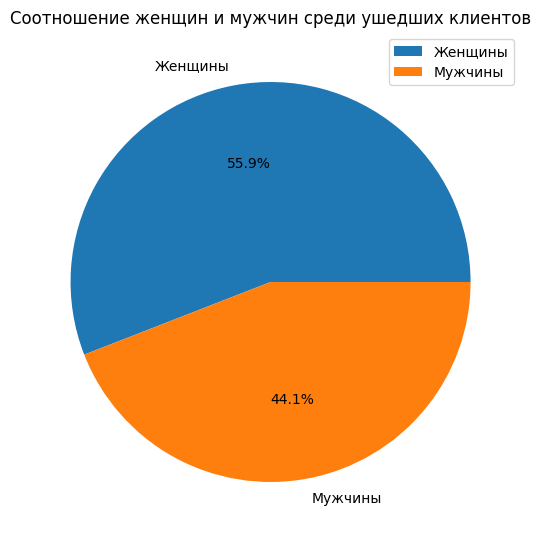

In [22]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

pie_data=bank_data[bank_data['Exited'] == 1]

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie_data['Gender'].value_counts(),
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%')
axes.set_title('Соотношение женщин и мужчин среди ушедших клиентов')
axes.legend(['Женщины', 'Мужчины'])


*Вывод:\
среди ушедших клиентов налицо явное преобладание женщин.*



In [57]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

#Создание сводной таблицы
grouped = bank_df.pivot_table(index='NumOfProducts',
                                     columns='Exited',
                                     values='CustomerId',
                                     aggfunc='count',
                                     fill_value = 0
                                     )

#Построение столбчатой диаграммы
fig = px.bar(grouped,
             barmode='group', #расположение значение рядом друг с другом
             title='Зависимость оттока клиентов от числа приобретенных услуг',
             color_discrete_sequence=['blue', 'orange'],
             opacity = 0.8,
             height=600,
             width=800
            )

#Настройка осей
fig.update_layout(xaxis_title='Количество приобретенных услуг', yaxis_title='Количество клиентов, чел.')
fig.show()

*Вывод:\
из графика следует, что для большинства ушедших клиентов характерно наличие одного банковского продукта в рассматриваемом кредитном учреждении, тогда как у лояльных клиентов их, как правило, два и (немного реже) один. Тремя и четырьями продуктами  пользовались (за редким исключением) исключительно ушедшие клиенты.*


In [60]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

#Создание сводной таблицы
grouped = bank_df.pivot_table(index='IsActiveMember',
                                     columns='Exited',
                                     values='CustomerId',
                                     aggfunc='count',
                                     fill_value = 0
                                     )

#Построение столбчатой диаграммы
fig = px.bar(grouped,
             barmode='group', #расположение значение рядом друг с другом
             title='Влияние статуса "активный клиент" на отток клиентов',
             color_discrete_sequence=['blue', 'red'],
             opacity = 0.8,
             height=600,
             width=800
            )

#Настройка осей
fig.update_layout(xaxis_title='Статус активного клиента', yaxis_title='Количество клиентов, чел.')
fig.show()

*Вывод:\
из графика следует примечательная особенность, характерная для лояльных клиентов банка: очень большой процент людей являются неактивными пользователями (более 3500 чел из 4400), то есть потенциальными кандидатами "на выход". Что и говорить об ушедших клиентах - их подавляющее большинство так же неактивно пользовались банковскими продуктами. 
Бесспорно, для "оживления" еще не ушедших клиентов банку необходимо начать поощрять их, побуждая к развитию взаимоотношений с кредитным учреждением: нацелиться на предоставление клиентам дополнительных продуктов на специальных условиях (в частности, кредитов, депозитов, ипотечных займов, страховок, услуг сотовой связи (при наличии)), а также подчеркивать удобство инструментов для управления личными финансами (в том числе мобильным банкингом).* 



In [111]:
#9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.


#Код 1

#Создание сводной таблицы
choropleth_data = bank_df.groupby(['Geography'])['Exited'].mean().reset_index()

#Построение тепловой картограммы
fig = px.choropleth(
    data_frame = choropleth_data,
    locations="Geography",
    locationmode='country names',
    color='Exited', #окрашивание в цвет
    title='Уход клиентов из банка в зависимости от страны (относительный показатель)',
    width=800,
    height=500,
    range_color=[0, 0.4],
    color_continuous_scale='Reds')

#Отображение графика
fig.show()


#Код 2
#Формирование маски и создание сводной таблицы
people_left = bank_df[bank_df['Exited'] == 1]
grouped = people_left.pivot_table(index='Geography',
                                     values='CustomerId',
                                     aggfunc='count',
                                     fill_value = 0
                                     ).reset_index()

#Построение тепловой картограммы
fig = px.choropleth(
    data_frame = grouped,
    locations="Geography",
    locationmode='country names',
    color='CustomerId', #окрашивание в цвет
    title='Уход клиентов из банка в зависимости от страны (абсолютный показатель)',
    width=800,
    height=500,
    range_color=[0, 1000],
    color_continuous_scale='Reds')

#Отображение графика
fig.show()


*Вывод:\
представленные графики выдают разные результаты. 
На второй картограмме по окрашиванию практически идентичной интенсивности мы видим, что наибольший и равнозначный отток приходится на Германию и Францию. Однако с учетом того, что на втором графике речь идет об абсолютных показателях, которые тяжело сравнивать между собой из-за наличия многих других факторов (общее количество клиентов в стране, количество отделений, доля рынка и многое другое), стоит обратить внимание на первый график с применением более объективного относительного расчета, в котором именно на Германию приходится наибольшая доля ушедших из банка клиентов. Стоит предположить, что причиной этого могли послужить ужесточение денежно-кредитной политики страны (к примеру, повышение ставки рефинансирования), а также агрессивная кампания банка-конкурента по переманиванию клиентов из других банков.* 

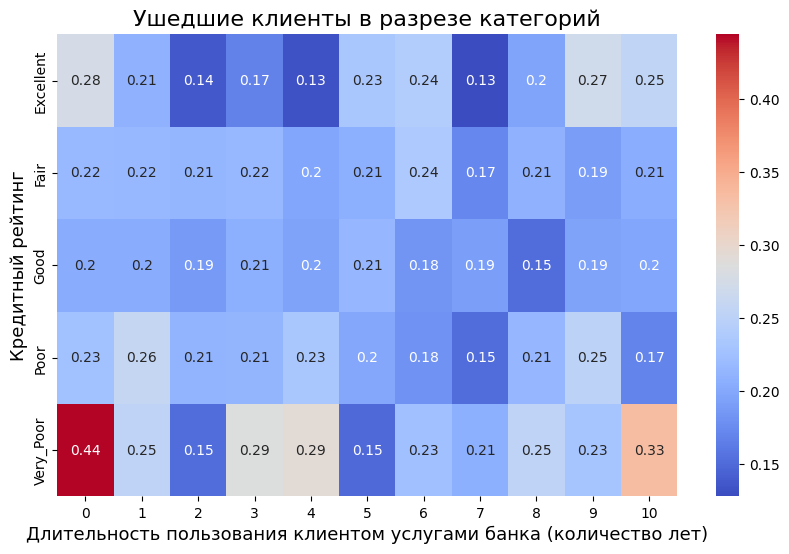

In [151]:
#9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

#функция переименования столбца CreditScore
def get_credit_score_cat(credit_score): 
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

bank_df['CreditScoreCat'] = bank_df['CreditScore'].apply(get_credit_score_cat) # создаем новый столбец, применяя функцию к имеющемуся столбцу CreditScore

#создаем сводную таблицу
pivot = bank_df.pivot_table(
    index='CreditScoreCat', 
    columns='Tenure', 
    values='Exited', 
    aggfunc='mean')

#строим тепловую карту

import seaborn as sns #импорт библиотеки seaborn

fig = plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data=pivot, cmap='coolwarm', annot=True) 
heatmap.set_title('Ушедшие клиенты в разрезе категорий', fontsize=16) #задаем название графика
plt.xlabel('Длительность пользования клиентом услугами банка (количество лет)', fontsize = 13) #переименование оси х
plt.ylabel('Кредитный рейтинг', fontsize = 13) #переименование оси y
plt.show()


*Вывод:\
На тепловой карте налицо уход из банка клиентов, имевщих самый низкий кредитный рейтинг (Very_Poor) и пользовавшихся услугами банка на протяжении менее одного года. Однако среди покинувших кредитное учреждение есть и доля тех, кто пользовался его услугами и более продолжительное время (до 10 лет).* 